# Data

In [1]:
%matplotlib notebook
from pathlib import Path
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np
from celluloid import Camera
from IPython.display import HTML

In [2]:
root = Path('Data/Atrium/Task03_Liver/imagesTr/')
label = Path('Data/Atrium/Task03_Liver/labelsTr/')

In [3]:
def change_img_to_label_path(path):
    """
    Replaces imagesTr with labelsTr
    """
    parts = list(path.parts)  # get all directories within the path
    parts[parts.index("imagesTr")] = "labelsTr"  # Replace imagesTr with labelsTr
    return Path(*parts)  # Combine list back into a Path object


In [5]:
sample_path = list(root.glob('liver*'))[0]
sample_label_path = change_img_to_label_path(sample_path)

In [6]:
ct = nib.load(sample_path).get_fdata()
mask = nib.load(sample_label_path).get_fdata().astype(int)

In [7]:
ct.shape

(512, 512, 75)

<IPython.core.display.Javascript object>


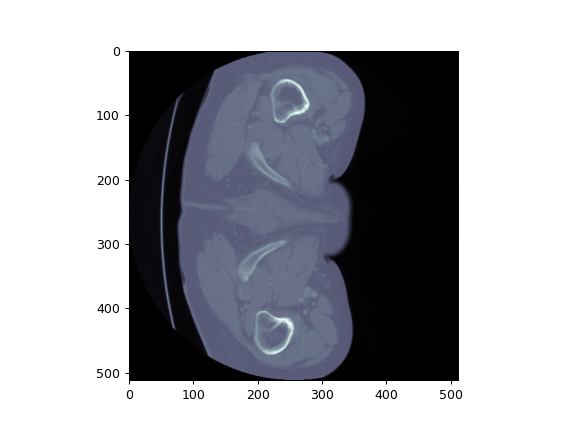

In [8]:
fig = plt.figure()
camera = Camera(fig)

for i in range(ct.shape[2]):
    plt.imshow(ct[:, :, i], cmap='bone')
    
    mask_ = np.ma.masked_where(mask[:, :, i] == 0, mask[:, :, i])
    plt.imshow(mask_, alpha=0.5, cmap='autumn')
    
    camera.snap()

animation = camera.animate()

In [9]:
HTML(animation.to_html5_video())

C:\Users\anama\anaconda3\envs\pytorch39\lib\site-packages\matplotlib\image.py:443: UserWarning: Warning: converting a masked element to nan.
  dv = np.float64(self.norm.vmax) - np.float64(self.norm.vmin)
C:\Users\anama\anaconda3\envs\pytorch39\lib\site-packages\matplotlib\image.py:444: UserWarning: Warning: converting a masked element to nan.
  vmid = np.float64(self.norm.vmin) + dv / 2
